# **Challenge**

In [371]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [372]:
ny_crime = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

**Features: **population

**Target: **violent crime

In [373]:
print(ny_crime.dtypes)

ny_crime.head()

City                                       object
Population                                 object
Violent\rcrime                             object
Murder and\rnonnegligent\rmanslaughter      int64
Rape\r(revised\rdefinition)1              float64
Rape\r(legacy\rdefinition)2                object
Robbery                                    object
Aggravated\rassault                        object
Property\rcrime                            object
Burglary                                   object
Larceny-\rtheft                            object
Motor\rvehicle\rtheft                      object
Arson3                                    float64
dtype: object


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan


In [374]:
# Fill empty cells
ny_crime.fillna(0)

# Rename columns
ny_crime.columns = ['city', 'population', 'violent_crime', 'murder', 'rape_revised', 'rape', 'robbery', 'aggravated_assault', 'property_crime', 'burglary', 'larceny_theft', 'motor_vehicle_theft', 'arson']

# Remove commas from numeric strings
ny_crime['population'] = ny_crime['population'].apply(lambda x: int(x.replace(',', '')))
ny_crime['violent_crime'] = ny_crime['violent_crime'].apply(lambda x: int(x.replace(',', '')))
ny_crime['rape'] = ny_crime['rape'].apply(lambda x: int(x.replace(',', '')))
ny_crime['robbery'] = ny_crime['robbery'].apply(lambda x: int(x.replace(',', '')))
ny_crime['aggravated_assault'] = ny_crime['aggravated_assault'].apply(lambda x: int(x.replace(',', '')))
ny_crime['property_crime'] = ny_crime['property_crime'].apply(lambda x: int(x.replace(',', '')))
ny_crime['burglary'] = ny_crime['burglary'].apply(lambda x: int(x.replace(',', '')))
ny_crime['larceny_theft'] = ny_crime['larceny_theft'].apply(lambda x: int(x.replace(',', '')))
ny_crime['motor_vehicle_theft'] = ny_crime['motor_vehicle_theft'].apply(lambda x: int(x.replace(',', '')))

# Drop rape_revised since it has no data
ny_crime = ny_crime.drop('rape_revised', axis=1).dropna()

print(ny_crime.dtypes)
ny_crime.head()

city                    object
population               int64
violent_crime            int64
murder                   int64
rape                     int64
robbery                  int64
aggravated_assault       int64
property_crime           int64
burglary                 int64
larceny_theft            int64
motor_vehicle_theft      int64
arson                  float64
dtype: object


,city,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3.000


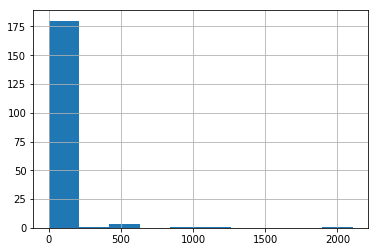

In [375]:
ny_crime['violent_crime'].hist()

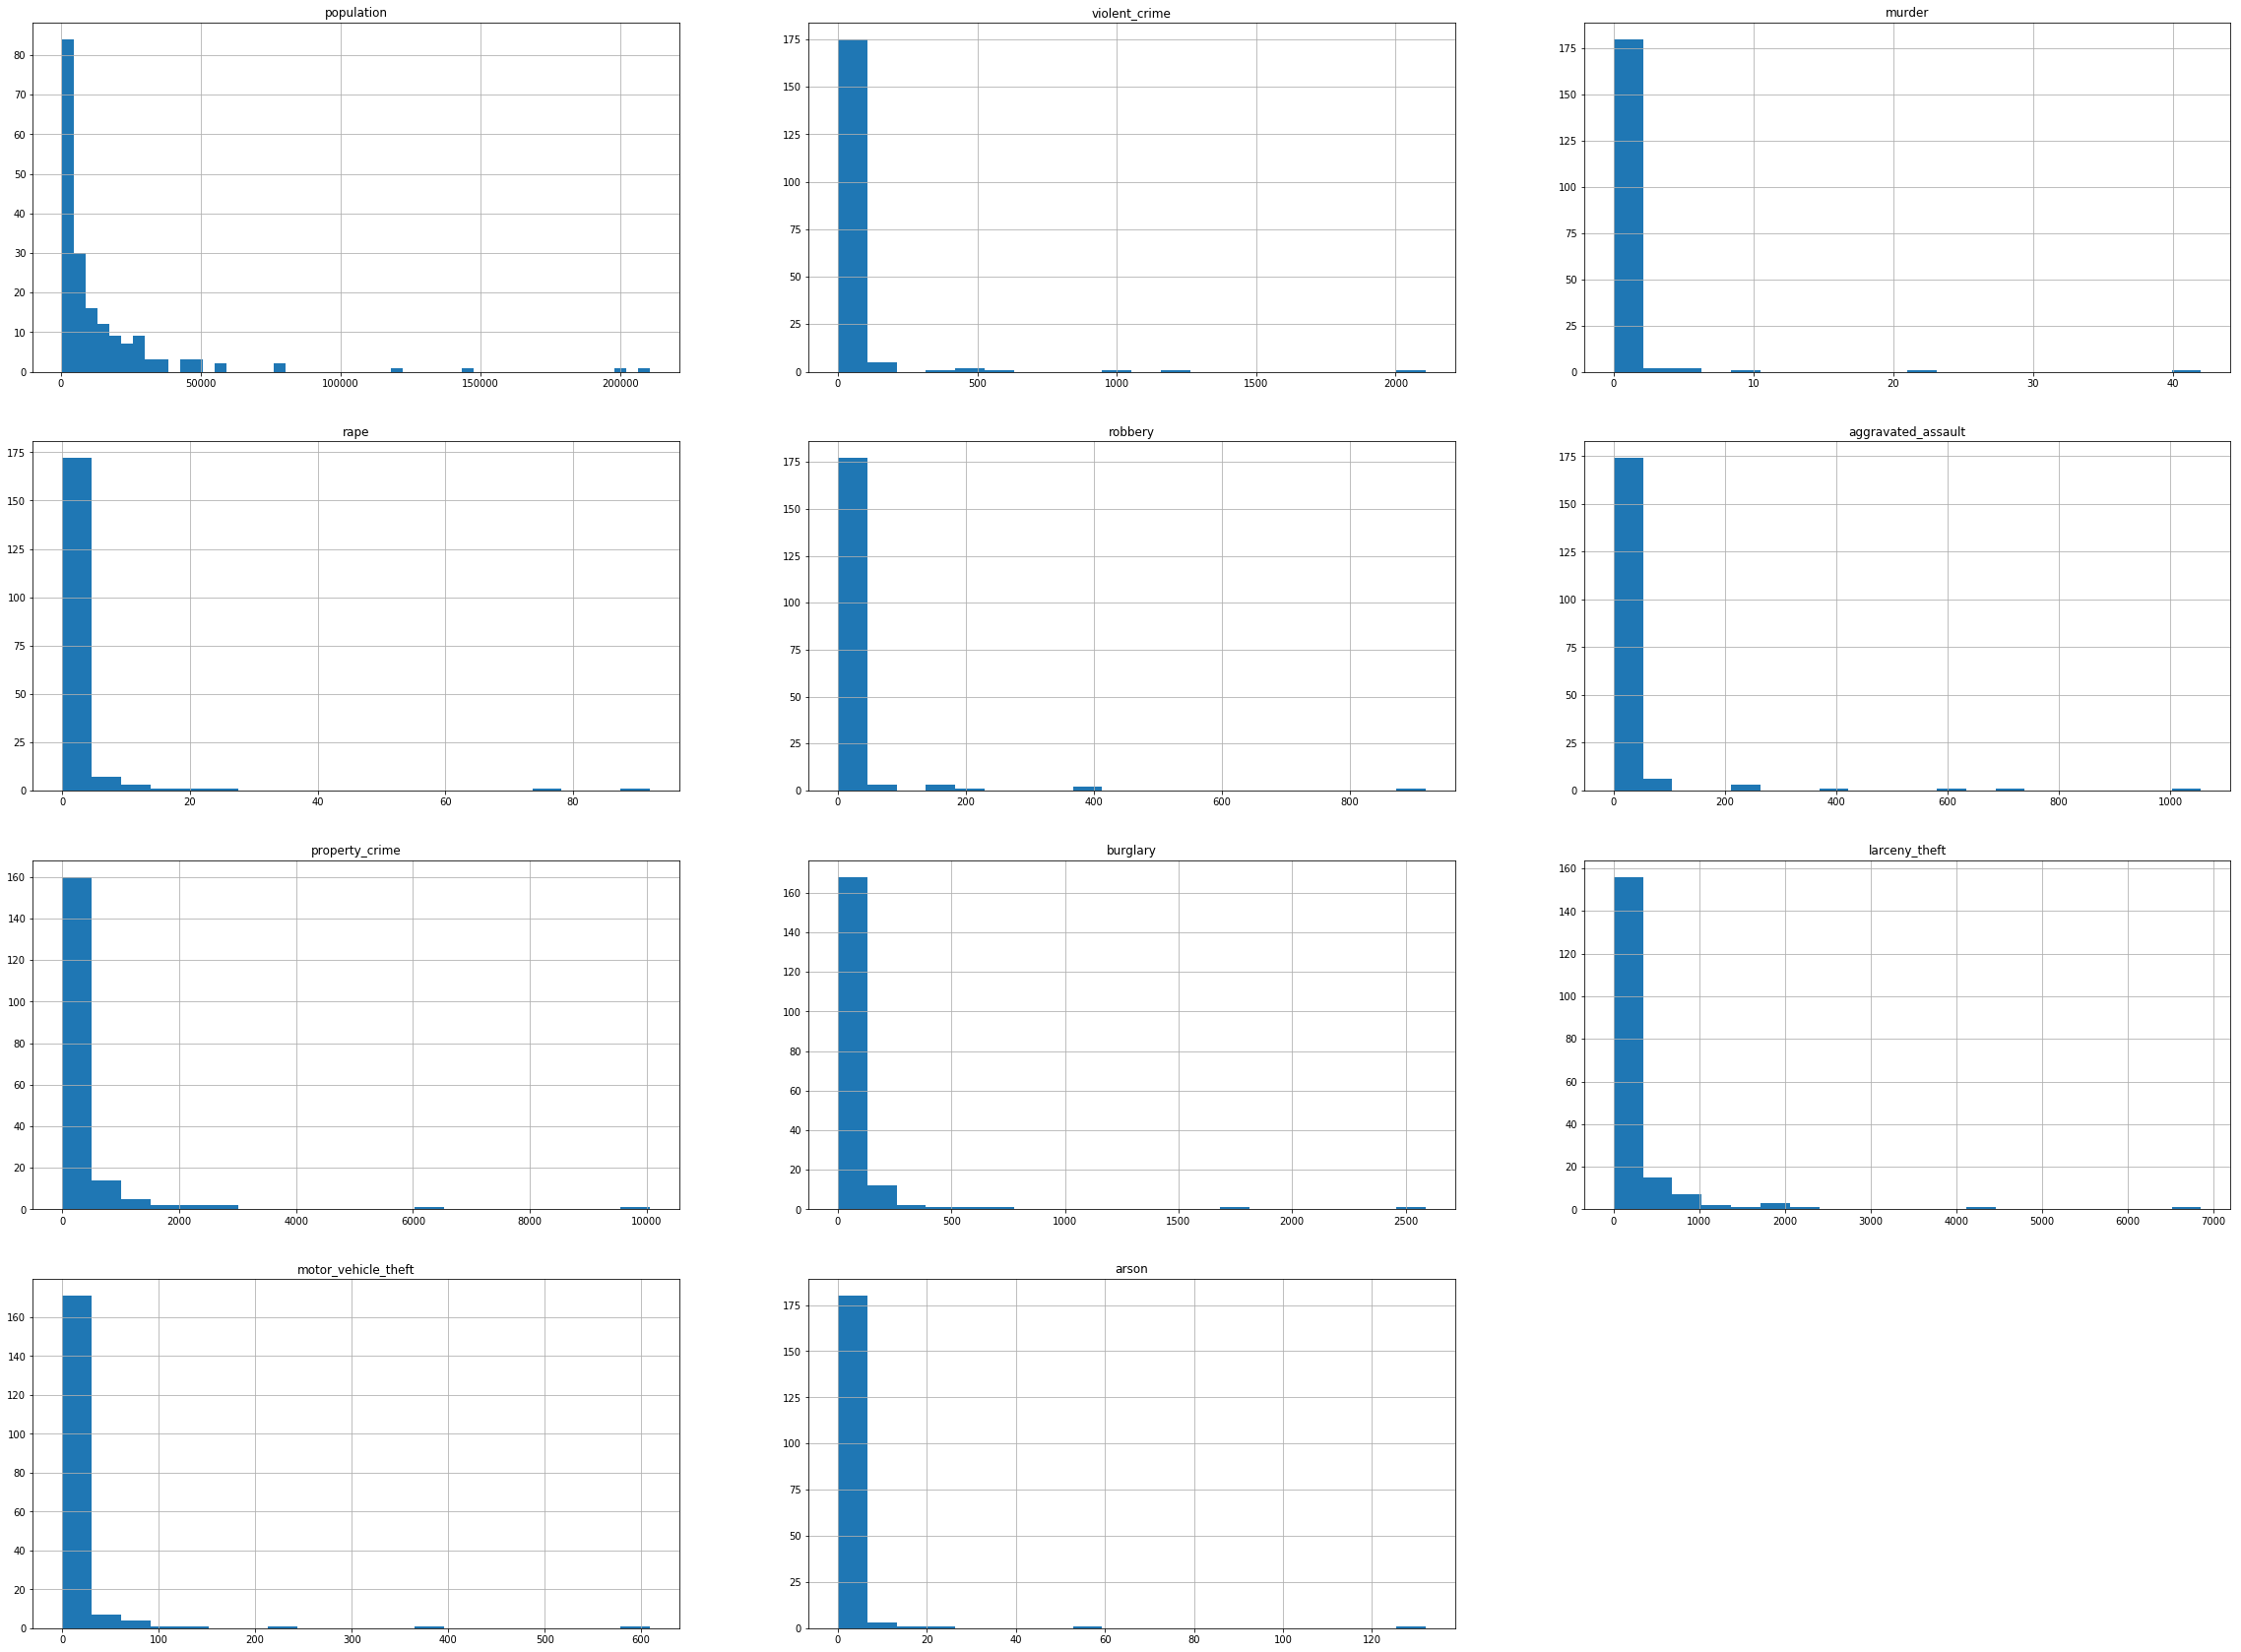

In [376]:
# Plot the distributions
plt.figure(figsize=(40,30))
plt.subplot(4,3,1)
ny_crime['population'].hist(bins=50)
plt.title('population')

plt.subplot(4,3,2)
ny_crime['violent_crime'].hist(bins=20)
plt.title('violent_crime')

plt.subplot(4,3,3)
ny_crime['murder'].hist(bins=20)
plt.title('murder')

plt.subplot(4,3,4)
ny_crime['rape'].hist(bins=20)
plt.title('rape')

plt.subplot(4,3,5)
ny_crime['robbery'].hist(bins=20)
plt.title('robbery')

plt.subplot(4,3,6)
ny_crime['aggravated_assault'].hist(bins=20)
plt.title('aggravated_assault')

plt.subplot(4,3,7)
ny_crime['property_crime'].hist(bins=20)
plt.title('property_crime')

plt.subplot(4,3,8)
ny_crime['burglary'].hist(bins=20)
plt.title('burglary')

plt.subplot(4,3,9)
ny_crime['larceny_theft'].hist(bins=20)
plt.title('larceny_theft')

plt.subplot(4,3,10)
ny_crime['motor_vehicle_theft'].hist(bins=20)
plt.title('motor_vehicle_theft')

plt.subplot(4,3,11)
ny_crime['arson'].hist(bins=20)
plt.title('arson')

plt.show()

In [377]:
print(ny_crime.dtypes)

city                    object
population               int64
violent_crime            int64
murder                   int64
rape                     int64
robbery                  int64
aggravated_assault       int64
property_crime           int64
burglary                 int64
larceny_theft            int64
motor_vehicle_theft      int64
arson                  float64
dtype: object


In [378]:
# Filter out any outliers over two standard deviations above the mean
pop_cutoff = ny_crime['population'].mean() + 2*ny_crime['population'].std()
vc_cutoff = ny_crime['violent_crime'].mean() + 2*ny_crime['violent_crime'].std()
mur_cutoff = ny_crime['murder'].mean() + 2*ny_crime['murder'].std()
rape_cutoff = ny_crime['rape'].mean() + 2*ny_crime['rape'].std()
rob_cutoff = ny_crime['robbery'].mean() + 2*ny_crime['robbery'].std()
aggr_cutoff = ny_crime['aggravated_assault'].mean() + 2*ny_crime['aggravated_assault'].std()
prop_cutoff = ny_crime['property_crime'].mean() + 2*ny_crime['property_crime'].std()
burg_cutoff = ny_crime['burglary'].mean() + 2*ny_crime['burglary'].std()
lt_cutoff = ny_crime['larceny_theft'].mean() + 2*ny_crime['larceny_theft'].std()
mvt_cutoff = ny_crime['motor_vehicle_theft'].mean() + 2*ny_crime['motor_vehicle_theft'].std()
ar_cutoff = ny_crime['arson'].mean() + 2*ny_crime['arson'].std()

ny_crime['population'] = ny_crime['population'].map(lambda x: x if x < pop_cutoff else None)
ny_crime['violent_crime'] = ny_crime['violent_crime'].map(lambda x: x if x < vc_cutoff else None)
ny_crime['murder'] = ny_crime['murder'].map(lambda x: x if x < mur_cutoff else None)
ny_crime['rape'] = ny_crime['rape'].map(lambda x: x if x < rape_cutoff else None)
ny_crime['robbery'] = ny_crime['robbery'].map(lambda x: x if x < rob_cutoff else None)
ny_crime['aggravated_assault'] = ny_crime['aggravated_assault'].map(lambda x: x if x < aggr_cutoff else None)
ny_crime['property_crime'] = ny_crime['property_crime'].map(lambda x: x if x < prop_cutoff else None)
ny_crime['burglary'] = ny_crime['burglary'].map(lambda x: x if x < burg_cutoff else None)
ny_crime['larceny_theft'] = ny_crime['larceny_theft'].map(lambda x: x if x < lt_cutoff else None)
ny_crime['motor_vehicle_theft'] = ny_crime['motor_vehicle_theft'].map(lambda x: x if x < mvt_cutoff else None)
ny_crime['arson'] = ny_crime['arson'].map(lambda x: x if x < ar_cutoff else None)

ny_crime.describe()

,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson
count,181.000,183.000,184.000,183.000,183.000,182.000,182.000,183.000,180.000,184.000,185.000
mean,10700.425,20.104,0.179,1.077,6.470,10.758,215.159,35.273,156.183,7.408,0.870
std,12259.553,56.862,0.728,2.366,21.214,26.397,354.941,64.023,230.500,17.537,2.457
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2116.000,1.000,0.000,0.000,0.000,0.000,19.000,3.000,15.000,0.000,0.000
50%,5881.000,3.000,0.000,0.000,0.000,2.500,68.500,10.000,53.500,2.000,0.000
75%,14987.000,16.500,0.000,1.000,4.000,10.000,249.000,36.000,199.500,5.000,1.000
max,58082.000,435.000,6.000,14.000,166.000,216.000,2118.000,470.000,1305.000,122.000,22.000


In [379]:
# Filter out any outliers over two standard deviations above the mean
pop_cutoff = ny_crime['population'].mean() - 2*ny_crime['population'].std()
vc_cutoff = ny_crime['violent_crime'].mean() - 2*ny_crime['violent_crime'].std()
mur_cutoff = ny_crime['murder'].mean() - 2*ny_crime['murder'].std()
rape_cutoff = ny_crime['rape'].mean() - 2*ny_crime['rape'].std()
rob_cutoff = ny_crime['robbery'].mean() - 2*ny_crime['robbery'].std()
aggr_cutoff = ny_crime['aggravated_assault'].mean() - 2*ny_crime['aggravated_assault'].std()
prop_cutoff = ny_crime['property_crime'].mean() - 2*ny_crime['property_crime'].std()
burg_cutoff = ny_crime['burglary'].mean() - 2*ny_crime['burglary'].std()
lt_cutoff = ny_crime['larceny_theft'].mean() - 2*ny_crime['larceny_theft'].std()
mvt_cutoff = ny_crime['motor_vehicle_theft'].mean() - 2*ny_crime['motor_vehicle_theft'].std()
ar_cutoff = ny_crime['arson'].mean() - 2*ny_crime['arson'].std()

ny_crime['population'] = ny_crime['population'].map(lambda x: x if x > pop_cutoff else None)
ny_crime['violent_crime'] = ny_crime['violent_crime'].map(lambda x: x if x > vc_cutoff else None)
ny_crime['murder'] = ny_crime['murder'].map(lambda x: x if x > mur_cutoff else None)
ny_crime['rape'] = ny_crime['rape'].map(lambda x: x if x > rape_cutoff else None)
ny_crime['robbery'] = ny_crime['robbery'].map(lambda x: x if x > rob_cutoff else None)
ny_crime['aggravated_assault'] = ny_crime['aggravated_assault'].map(lambda x: x if x > aggr_cutoff else None)
ny_crime['property_crime'] = ny_crime['property_crime'].map(lambda x: x if x > prop_cutoff else None)
ny_crime['burglary'] = ny_crime['burglary'].map(lambda x: x if x > burg_cutoff else None)
ny_crime['larceny_theft'] = ny_crime['larceny_theft'].map(lambda x: x if x > lt_cutoff else None)
ny_crime['motor_vehicle_theft'] = ny_crime['motor_vehicle_theft'].map(lambda x: x if x > mvt_cutoff else None)
ny_crime['arson'] = ny_crime['arson'].map(lambda x: x if x > ar_cutoff else None)

ny_crime.describe()

,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson
count,181.000,183.000,184.000,183.000,183.000,182.000,182.000,183.000,180.000,184.000,185.000
mean,10700.425,20.104,0.179,1.077,6.470,10.758,215.159,35.273,156.183,7.408,0.870
std,12259.553,56.862,0.728,2.366,21.214,26.397,354.941,64.023,230.500,17.537,2.457
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2116.000,1.000,0.000,0.000,0.000,0.000,19.000,3.000,15.000,0.000,0.000
50%,5881.000,3.000,0.000,0.000,0.000,2.500,68.500,10.000,53.500,2.000,0.000
75%,14987.000,16.500,0.000,1.000,4.000,10.000,249.000,36.000,199.500,5.000,1.000
max,58082.000,435.000,6.000,14.000,166.000,216.000,2118.000,470.000,1305.000,122.000,22.000


In [380]:
#from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

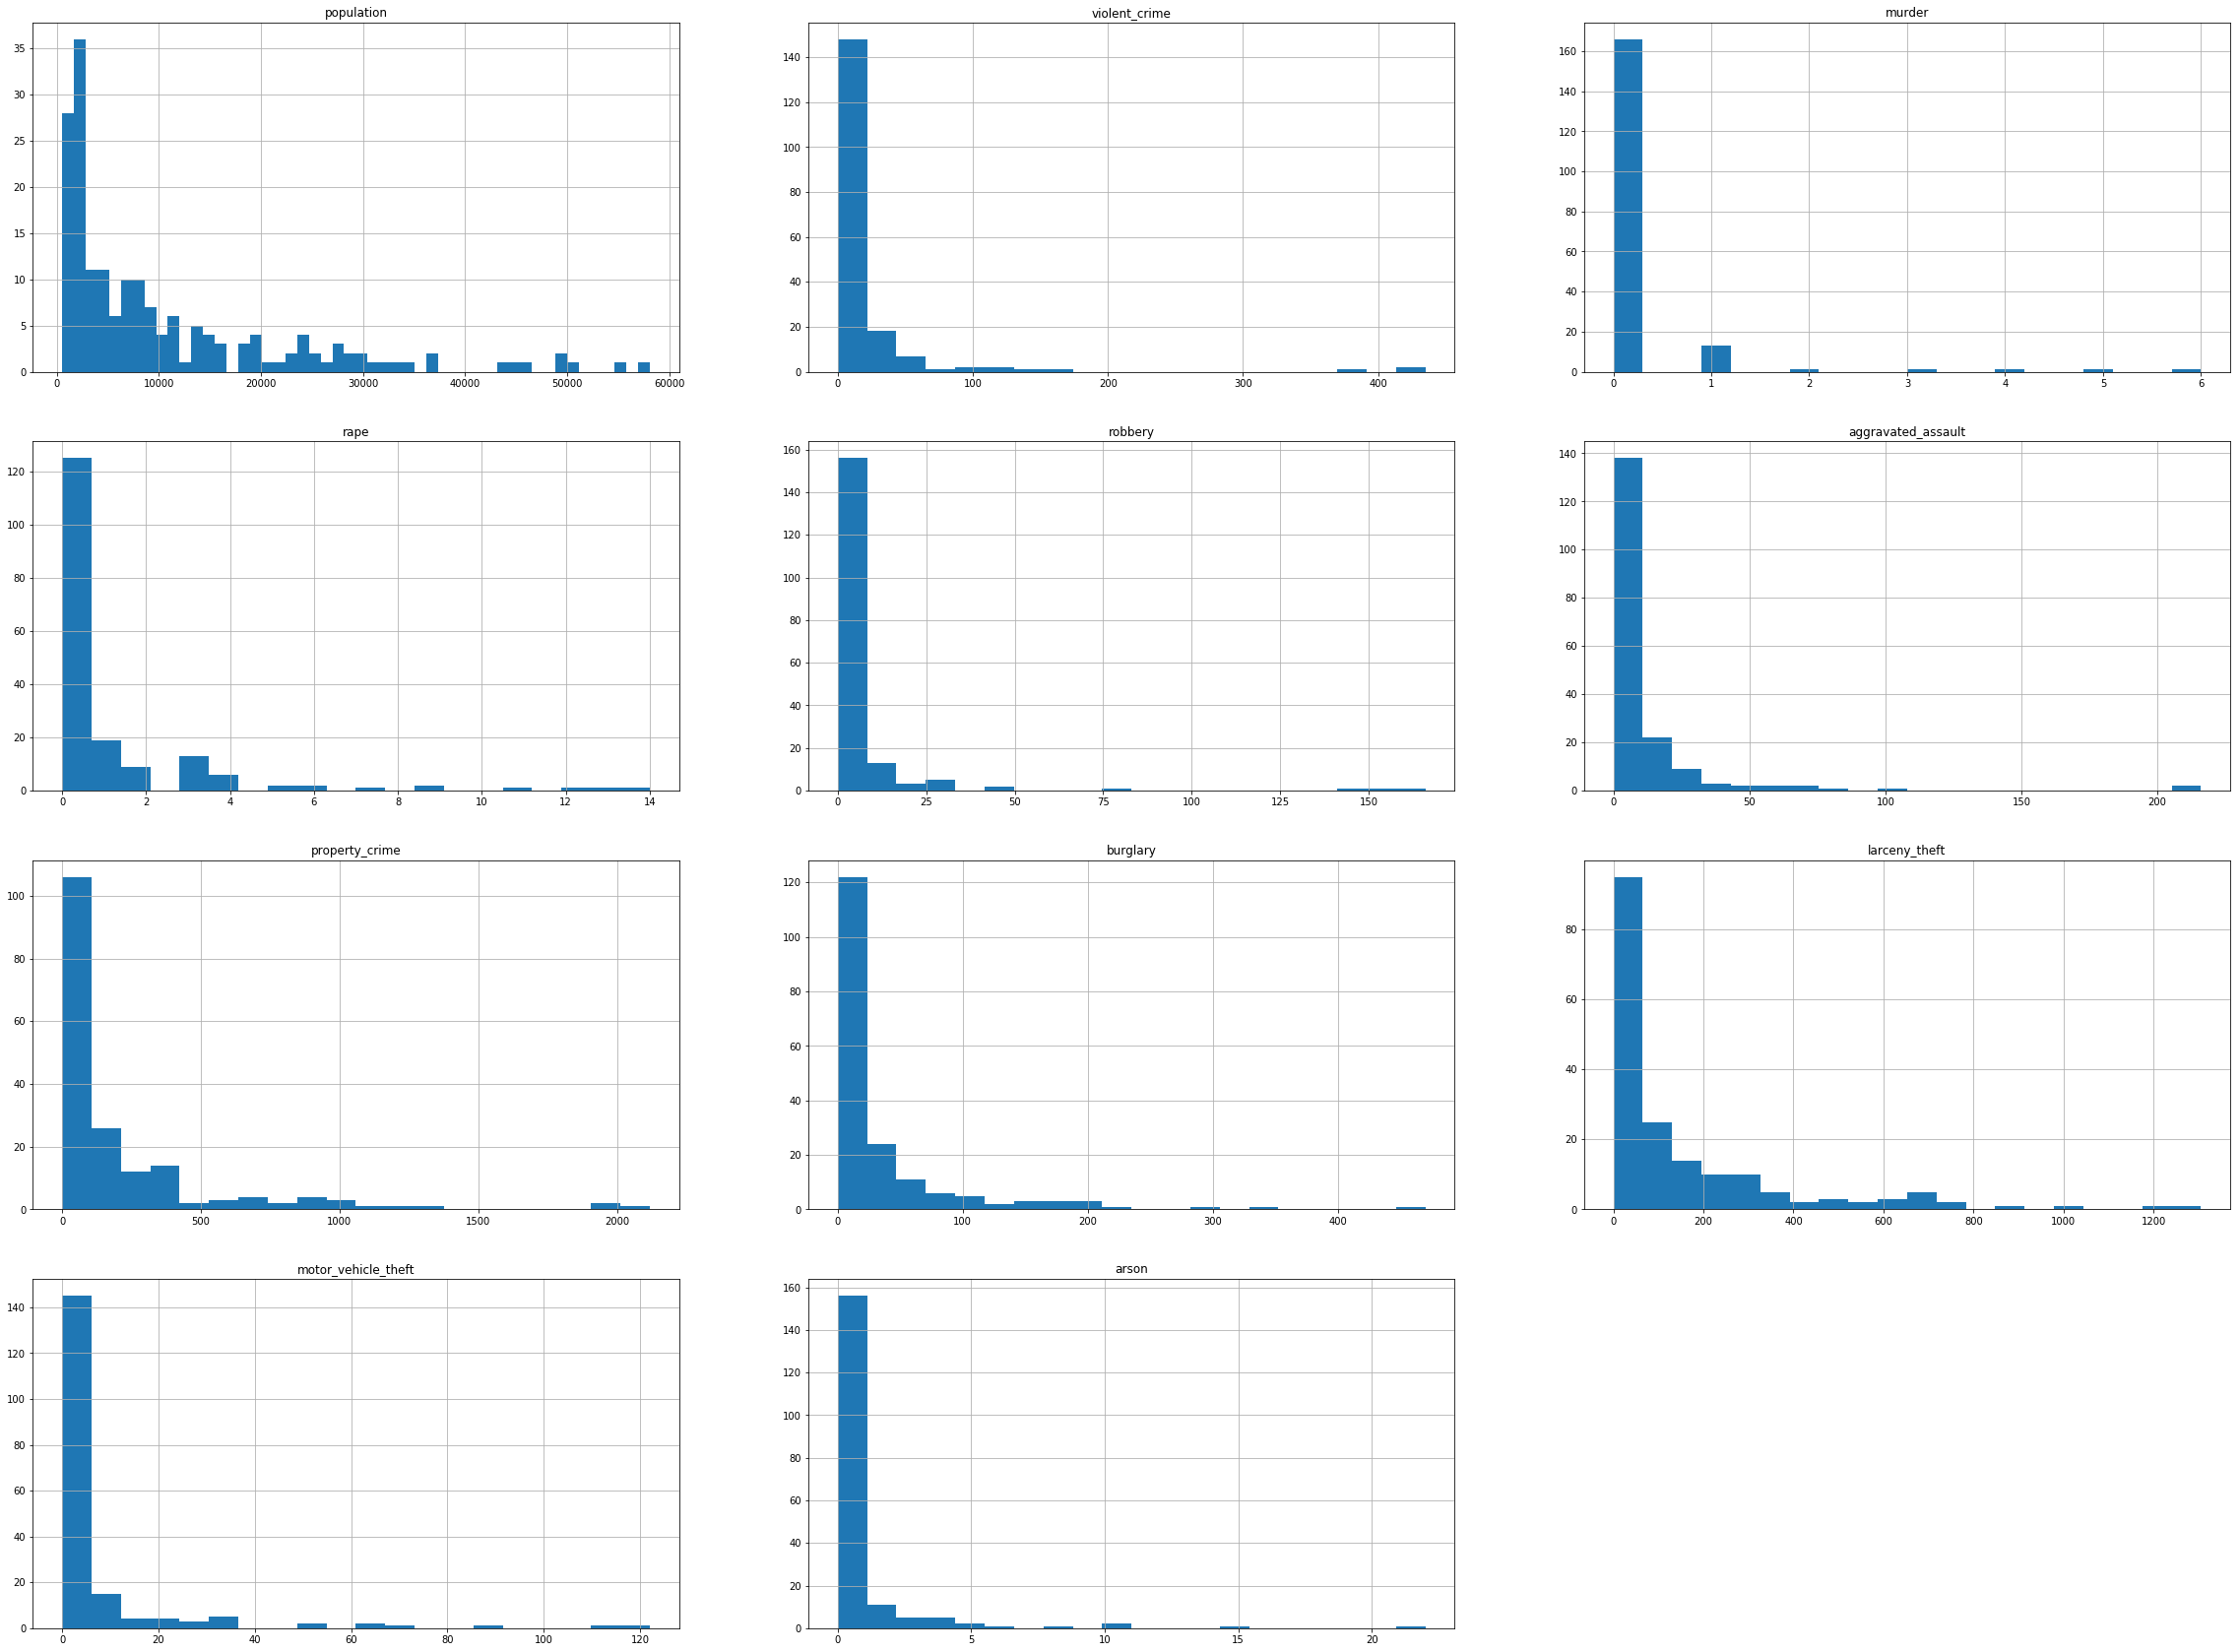

In [381]:
# Plot distributions again to check outliers
plt.figure(figsize=(40,30))
plt.subplot(4,3,1)
ny_crime['population'].hist(bins=50)
plt.title('population')

plt.subplot(4,3,2)
ny_crime['violent_crime'].hist(bins=20)
plt.title('violent_crime')

plt.subplot(4,3,3)
ny_crime['murder'].hist(bins=20)
plt.title('murder')

plt.subplot(4,3,4)
ny_crime['rape'].hist(bins=20)
plt.title('rape')

plt.subplot(4,3,5)
ny_crime['robbery'].hist(bins=20)
plt.title('robbery')

plt.subplot(4,3,6)
ny_crime['aggravated_assault'].hist(bins=20)
plt.title('aggravated_assault')

plt.subplot(4,3,7)
ny_crime['property_crime'].hist(bins=20)
plt.title('property_crime')

plt.subplot(4,3,8)
ny_crime['burglary'].hist(bins=20)
plt.title('burglary')

plt.subplot(4,3,9)
ny_crime['larceny_theft'].hist(bins=20)
plt.title('larceny_theft')

plt.subplot(4,3,10)
ny_crime['motor_vehicle_theft'].hist(bins=20)
plt.title('motor_vehicle_theft')

plt.subplot(4,3,11)
ny_crime['arson'].hist(bins=20)
plt.title('arson')

plt.show()

In [382]:
ny_crime['population_sq'] = ny_crime['population']**2

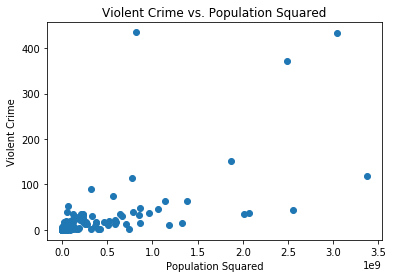

In [383]:
plt.scatter(x=ny_crime['population_sq'], y=ny_crime['violent_crime'])
plt.xlabel('Population Squared')
plt.ylabel('Violent Crime')
plt.title('Violent Crime vs. Population Squared')
plt.show()

In [384]:
ny_crime['murder_sq'] = ny_crime['murder']**2

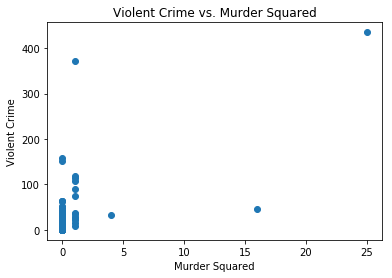

In [385]:
plt.scatter(x=ny_crime['murder_sq'], y=ny_crime['violent_crime'])
plt.xlabel('Murder Squared')
plt.ylabel('Violent Crime')
plt.title('Violent Crime vs. Murder Squared')
plt.show()

In [386]:
ny_crime['rape_sq'] = ny_crime['rape']**2

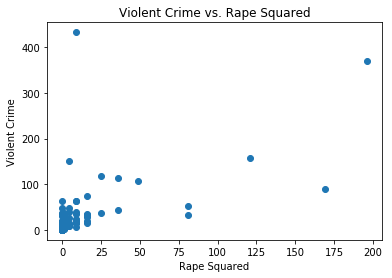

In [387]:
plt.scatter(x=ny_crime['rape_sq'], y=ny_crime['violent_crime'])
plt.xlabel('Rape Squared')
plt.ylabel('Violent Crime')
plt.title('Violent Crime vs. Rape Squared')
plt.show()

In [388]:
ny_crime['arson_sq'] = ny_crime['arson']**2

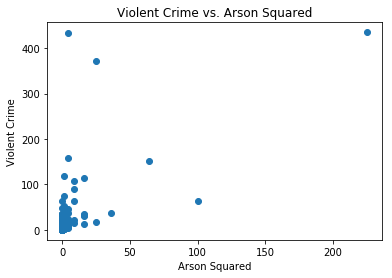

In [389]:
plt.scatter(x=ny_crime['arson_sq'], y=ny_crime['violent_crime'])
plt.xlabel('Arson Squared')
plt.ylabel('Violent Crime')
plt.title('Violent Crime vs. Arson Squared')
plt.show()

In [390]:
ny_crime['total_theft'] = ny_crime['burglary'] + ny_crime['larceny_theft'] + ny_crime['motor_vehicle_theft']

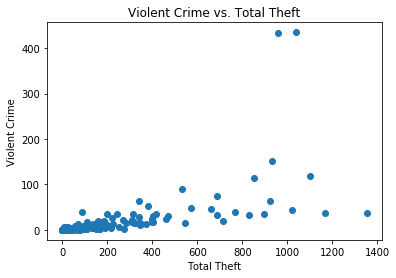

In [391]:
plt.scatter(x=ny_crime['total_theft'], y=ny_crime['violent_crime'],)
plt.xlabel('Total Theft')
plt.ylabel('Violent Crime')
plt.title('Violent Crime vs. Total Theft')
plt.show()

In [392]:
ny_crime['total_violence'] = ny_crime['murder'] + ny_crime['rape'] + ny_crime['robbery'] + ny_crime['aggravated_assault'] + ny_crime['arson']

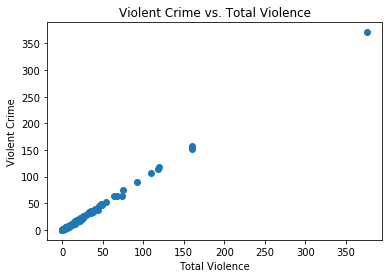

In [393]:
plt.scatter(x=ny_crime['total_violence'], y=ny_crime['violent_crime'])
plt.xlabel('Total Violence')
plt.ylabel('Violent Crime')
plt.title('Violent Crime vs. Total Violence')
plt.show()

In [394]:
cutoff1 = ny_crime['population_sq'].mean() + 2*ny_crime['population_sq'].std()
cutoff2 = ny_crime['murder_sq'].mean() + 2*ny_crime['murder_sq'].std()
cutoff3 = ny_crime['rape_sq'].mean() + 2*ny_crime['rape_sq'].std()
cutoff4 = ny_crime['arson_sq'].mean() + 2*ny_crime['arson_sq'].std()
cutoff5 = ny_crime['total_theft'].mean() + 2*ny_crime['total_theft'].std()
cutoff6 = ny_crime['total_violence'].mean() + 2*ny_crime['total_violence'].std()

ny_crime['population_sq'] = ny_crime['population_sq'].map(lambda x: x if x < cutoff1 else None)
#ny_crime['murder_sq'] = ny_crime['murder_sq'].map(lambda x: x if x < cutoff2 else None)
#ny_crime['rape_sq'] = ny_crime['rape_sq'].map(lambda x: x if x < cutoff2 else None)
#ny_crime['arson_sq'] = ny_crime['arson_sq'].map(lambda x: x if x < cutoff2 else None)
#ny_crime['total_theft'] = ny_crime['total_theft'].map(lambda x: x if x < cutoff2 else None)
#ny_crime['total_violence'] = ny_crime['total_violence'].map(lambda x: x if x < cutoff2 else None)

ny_crime.describe()

,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,population_sq,murder_sq,rape_sq,arson_sq,total_theft,total_violence
count,181.000,183.000,184.000,183.000,183.000,182.000,182.000,183.000,180.000,184.000,185.000,173.000,184.000,183.000,185.000,179.000,181.000
mean,10700.425,20.104,0.179,1.077,6.470,10.758,215.159,35.273,156.183,7.408,0.870,161268955.769,0.560,6.727,6.762,184.726,16.149
std,12259.553,56.862,0.728,2.366,21.214,26.397,354.941,64.023,230.500,17.537,2.457,284592665.288,3.490,25.267,40.710,267.468,37.487
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,0.000,0.000
25%,2116.000,1.000,0.000,0.000,0.000,0.000,19.000,3.000,15.000,0.000,0.000,4218916.000,0.000,0.000,0.000,18.500,1.000
50%,5881.000,3.000,0.000,0.000,0.000,2.500,68.500,10.000,53.500,2.000,0.000,29160000.000,0.000,0.000,0.000,64.000,3.000
75%,14987.000,16.500,0.000,1.000,4.000,10.000,249.000,36.000,199.500,5.000,1.000,147525316.000,0.000,1.000,1.000,223.000,17.000
max,58082.000,435.000,6.000,14.000,166.000,216.000,2118.000,470.000,1305.000,122.000,22.000,1383542416.000,36.000,196.000,484.000,1353.000,376.000


In [395]:
cutoff1 = ny_crime['population_sq'].mean() - 2*ny_crime['population_sq'].std()
cutoff2 = ny_crime['murder_sq'].mean() - 2*ny_crime['murder_sq'].std()
cutoff3 = ny_crime['rape_sq'].mean() - 2*ny_crime['rape_sq'].std()
cutoff4 = ny_crime['arson_sq'].mean() - 2*ny_crime['arson_sq'].std()
cutoff5 = ny_crime['total_theft'].mean() - 2*ny_crime['total_theft'].std()
cutoff6 = ny_crime['total_violence'].mean() - 2*ny_crime['total_violence'].std()

ny_crime['population_sq'] = ny_crime['population_sq'].map(lambda x: x if x > cutoff1 else None)
#ny_crime['murder_sq'] = ny_crime['murder_sq'].map(lambda x: x if x > cutoff2 else None)
#ny_crime['rape_sq'] = ny_crime['rape_sq'].map(lambda x: x if x > cutoff2 else None)
#ny_crime['arson_sq'] = ny_crime['arson_sq'].map(lambda x: x if x > cutoff2 else None)
#ny_crime['total_theft'] = ny_crime['total_theft'].map(lambda x: x if x > cutoff2 else None)
#ny_crime['total_violence'] = ny_crime['total_violence'].map(lambda x: x if x > cutoff2 else None)

ny_crime.describe()

,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,population_sq,murder_sq,rape_sq,arson_sq,total_theft,total_violence
count,181.000,183.000,184.000,183.000,183.000,182.000,182.000,183.000,180.000,184.000,185.000,173.000,184.000,183.000,185.000,179.000,181.000
mean,10700.425,20.104,0.179,1.077,6.470,10.758,215.159,35.273,156.183,7.408,0.870,161268955.769,0.560,6.727,6.762,184.726,16.149
std,12259.553,56.862,0.728,2.366,21.214,26.397,354.941,64.023,230.500,17.537,2.457,284592665.288,3.490,25.267,40.710,267.468,37.487
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,0.000,0.000
25%,2116.000,1.000,0.000,0.000,0.000,0.000,19.000,3.000,15.000,0.000,0.000,4218916.000,0.000,0.000,0.000,18.500,1.000
50%,5881.000,3.000,0.000,0.000,0.000,2.500,68.500,10.000,53.500,2.000,0.000,29160000.000,0.000,0.000,0.000,64.000,3.000
75%,14987.000,16.500,0.000,1.000,4.000,10.000,249.000,36.000,199.500,5.000,1.000,147525316.000,0.000,1.000,1.000,223.000,17.000
max,58082.000,435.000,6.000,14.000,166.000,216.000,2118.000,470.000,1305.000,122.000,22.000,1383542416.000,36.000,196.000,484.000,1353.000,376.000


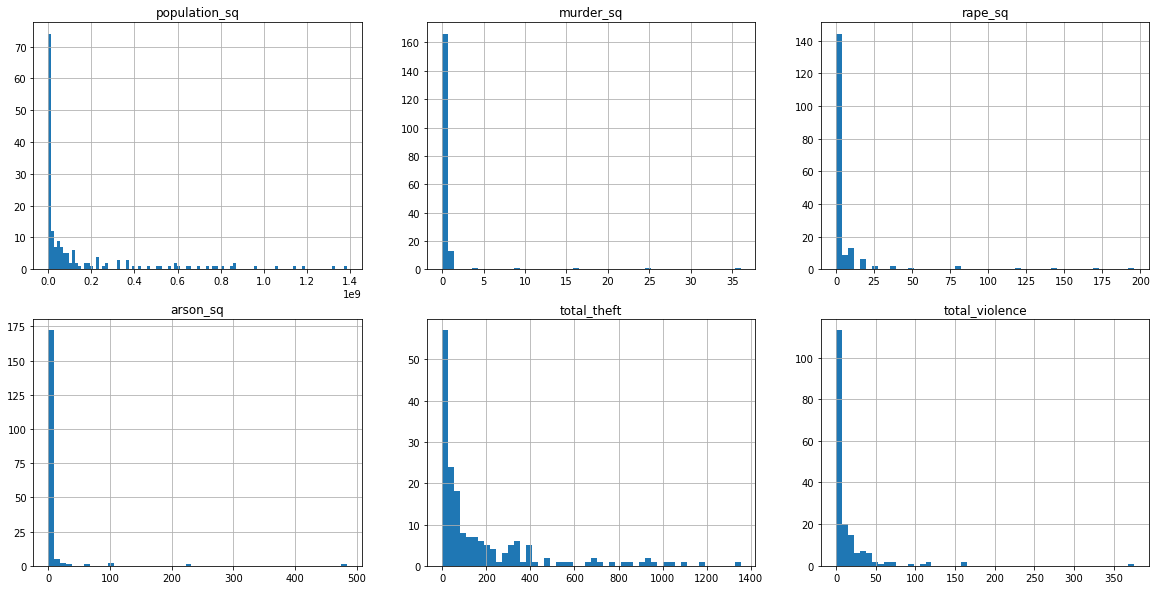

In [396]:
# Plot distributions again to check outliers
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
ny_crime['population_sq'].hist(bins=100)
plt.title('population_sq')

plt.subplot(2,3,2)
ny_crime['murder_sq'].hist(bins=50)
plt.title('murder_sq')

plt.subplot(2,3,3)
ny_crime['rape_sq'].hist(bins=50)
plt.title('rape_sq')

plt.subplot(2,3,4)
ny_crime['arson_sq'].hist(bins=50)
plt.title('arson_sq')

plt.subplot(2,3,5)
ny_crime['total_theft'].hist(bins=50)
plt.title('total_theft')

plt.subplot(2,3,6)
ny_crime['total_violence'].hist(bins=50)
plt.title('total_violence')

plt.show()

We can see that the range of the x-axis reduced in each case, which indicates that the extreme outliers have been removed.

In [397]:
# Create binary target variable
ny_crime['violent_cat']= (ny_crime['violent_crime'] > 20).astype(float)

#ny_crime['violent_cat'] = ny_crime['violent_crime'].apply(lambda x: 1 if x > 20 else 0)

ny_crime = ny_crime.dropna()

ny_crime.head()

,city,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,population_sq,murder_sq,rape_sq,arson_sq,total_theft,total_violence,violent_cat
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,3463321.000,0.000,0.000,0.000,12.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,6640929.000,0.000,0.000,0.000,24.000,3.000,0.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,8099716.000,0.000,0.000,0.000,16.000,3.000,0.000
6,Allegany Village,1781.000,3.000,0.000,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000,3171961.000,0.000,0.000,0.000,10.000,3.000,0.000
8,Amityville Village,9519.000,9.000,0.000,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000,90611361.000,0.000,4.000,1.000,210.000,10.000,0.000


In [398]:
correlation_matrix = ny_crime.corr()
display(correlation_matrix)

,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,population_sq,murder_sq,rape_sq,arson_sq,total_theft,total_violence,violent_cat
population,1.000,0.659,0.339,0.426,0.671,0.593,0.784,0.746,0.777,0.720,0.410,0.954,0.273,0.220,0.364,0.784,0.661,0.552
violent_crime,0.659,1.000,0.428,0.747,0.873,0.969,0.781,0.829,0.755,0.783,0.536,0.624,0.267,0.601,0.468,0.781,0.999,0.813
murder,0.339,0.428,1.000,0.249,0.494,0.328,0.380,0.496,0.345,0.524,0.328,0.344,0.904,0.212,0.281,0.380,0.433,0.416
rape,0.426,0.747,0.249,1.000,0.480,0.748,0.626,0.643,0.611,0.562,0.401,0.356,0.070,0.880,0.311,0.626,0.746,0.609
robbery,0.671,0.873,0.494,0.480,1.000,0.736,0.773,0.813,0.748,0.806,0.427,0.668,0.363,0.301,0.393,0.773,0.869,0.725
aggravated_assault,0.593,0.969,0.328,0.748,0.736,1.000,0.696,0.743,0.673,0.687,0.538,0.551,0.178,0.637,0.466,0.696,0.969,0.775
property_crime,0.784,0.781,0.380,0.626,0.773,0.696,1.000,0.934,0.997,0.824,0.516,0.746,0.282,0.413,0.438,1.000,0.786,0.700
burglary,0.746,0.829,0.496,0.643,0.813,0.743,0.934,1.000,0.905,0.835,0.533,0.707,0.410,0.441,0.438,0.934,0.833,0.735
larceny_theft,0.777,0.755,0.345,0.611,0.748,0.673,0.997,0.905,1.000,0.797,0.505,0.738,0.246,0.397,0.431,0.997,0.760,0.681
motor_vehicle_theft,0.720,0.783,0.524,0.562,0.806,0.687,0.824,0.835,0.797,1.000,0.445,0.725,0.445,0.474,0.389,0.824,0.784,0.652


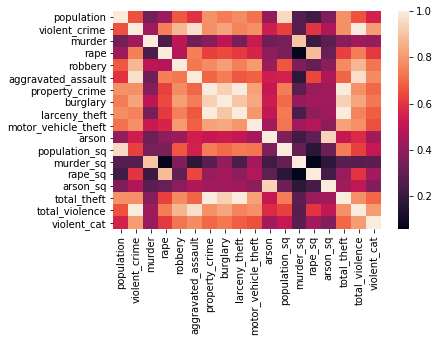

In [399]:
sns.heatmap(ny_crime.corr())

In [400]:
features = ny_crime.drop(['city', 'murder'], axis=1)
features.head()

,population,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,population_sq,murder_sq,rape_sq,arson_sq,total_theft,total_violence,violent_cat
0,1861.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,3463321.000,0.000,0.000,0.000,12.000,0.000,0.000
1,2577.000,3.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,6640929.000,0.000,0.000,0.000,24.000,3.000,0.000
2,2846.000,3.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,8099716.000,0.000,0.000,0.000,16.000,3.000,0.000
6,1781.000,3.000,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000,3171961.000,0.000,0.000,0.000,10.000,3.000,0.000
8,9519.000,9.000,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000,90611361.000,0.000,4.000,1.000,210.000,10.000,0.000


In [401]:
features.describe()

,population,violent_crime,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,population_sq,murder_sq,rape_sq,arson_sq,total_theft,total_violence,violent_cat
count,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000,172.000
mean,8786.517,10.029,0.785,2.756,6.407,150.890,22.459,124.715,3.715,0.442,157460623.878,0.163,3.750,1.151,150.890,10.471,0.145
std,8984.825,16.883,1.775,5.932,10.537,211.418,32.276,176.286,6.676,0.981,280967735.731,1.269,16.011,3.559,211.418,17.428,0.353
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2053.750,0.750,0.000,0.000,0.000,17.750,3.000,13.750,0.000,0.000,4217889.250,0.000,0.000,0.000,17.750,0.750,0.000
50%,5261.500,3.000,0.000,0.000,2.000,59.500,8.500,47.500,1.000,0.000,27702564.500,0.000,0.000,0.000,59.500,3.000,0.000
75%,11840.750,12.500,1.000,3.000,8.000,193.500,28.500,158.750,4.000,0.000,140234419.750,0.000,1.000,0.000,193.500,14.250,0.000
max,37196.000,114.000,13.000,47.000,64.000,1353.000,160.000,1182.000,35.000,5.000,1383542416.000,16.000,169.000,25.000,1353.000,118.000,1.000


# Vanilla Logistic Regression

In [402]:
X = ny_crime.drop(['city', 'violent_crime', 'violent_cat'], axis=1).dropna()
Y = ny_crime['violent_cat'].dropna()

# Declare a logistic regression classifier
vlr = LogisticRegression(C=1e8)

# Fit the model
fit = vlr.fit(X, Y)

# Run cross validation
vlr_cvs = cross_val_score(vlr, X, Y, cv=5)

# Display
print('\nCoefficients:')
print(fit.coef_)
print('\nIntercept:')
print(fit.intercept_)
print('\nCross Validation Scores:')
print(vlr_cvs)
print('\nAverage Cross Validation Score:')
print(vlr_cvs.mean()*100, '%')


Coefficients:
[[-3.24579367e-04  1.99873729e-07  1.69246365e-06  4.90039859e-06
   1.05469085e-05  1.24738460e-04  2.30023899e-05  9.83387913e-05
   3.39727859e-06  4.97993256e-07  1.17200260e-08  2.80347208e-07
   1.35195825e-05  1.73835400e-06  1.24738460e-04  1.78376378e-05]]

Intercept:
[-9.92995458e-07]

Cross Validation Scores:
[0.82857143 0.82857143 0.91176471 0.88235294 0.91176471]

Average Cross Validation Score:
87.26050420168067 %


# Ridge Logistic Regression

In [403]:
X = ny_crime.drop(['city', 'violent_crime', 'violent_cat'], axis=1).dropna()
Y = ny_crime['violent_crime'].dropna()

alphas = [1, 10, 25, 50, 75, 100]

for alpha in alphas:
    # Declare a ridge regression classifier
    rlr = linear_model.Ridge(alpha=alpha, fit_intercept=False) 
    
    # Fit the model
    fit = rlr.fit(X, Y)
    
    # Run cross validation
    rlr_cvs = cross_val_score(rlr, X, Y, cv=5)
    
    # Display
    print('\nLambda: ', alpha)
    print('\nCoefficients:')
    print(fit.coef_)
    print('\nCross Validation Scores:')
    print(rlr_cvs)
    print('\nAverage Cross Validation Score:')
    print(rlr_cvs.mean()*100, '%')


Lambda:  1

Coefficients:
[ 2.37948981e-07  2.67046890e-01  3.34016818e-01  3.41420885e-01
  3.38503765e-01 -1.03579512e-04 -3.83130420e-05  2.09791236e-04
 -2.75057524e-04 -6.20104308e-01 -2.13808897e-12  1.76052459e-02
  7.96555882e-04 -8.99907530e-03 -1.03579625e-04  6.60884051e-01]

Cross Validation Scores:
[0.99999737 0.99999269 0.9999985  0.99999658 0.99963287]

Average Cross Validation Score:
99.99236035356456 %


/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.920421e-20
  overwrite_a=True).T
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.557197e-20
  overwrite_a=True).T
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.490183e-20
  overwrite_a=True).T
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal con


Lambda:  10

Coefficients:
[ 2.50842303e-07  1.06708178e-01  2.83061936e-01  3.45702568e-01
  3.32539277e-01 -4.99971805e-04  1.51682443e-04  1.02594566e-03
 -1.67759990e-03 -4.03776162e-01  3.64294886e-11  4.56852406e-02
  5.75082923e-03 -5.91915903e-02 -4.99971813e-04  6.64235797e-01]

Cross Validation Scores:
[0.99991544 0.99975472 0.99993029 0.99989733 0.99994994]

Average Cross Validation Score:
99.98895450998806 %

Lambda:  25

Coefficients:
[-2.12557113e-07  6.08506164e-02  2.22116804e-01  3.37305009e-01
  3.20225462e-01 -6.60108037e-04  6.47937378e-04  1.36750344e-03
 -2.67554885e-03 -2.65491039e-01  8.54955822e-11  4.14569383e-02
  1.02075163e-02 -9.30149298e-02 -6.60108049e-04  6.75006853e-01]

Cross Validation Scores:
[0.9998127  0.99948738 0.99982599 0.9997631  0.99990356]

Average Cross Validation Score:
99.97585469579529 %

Lambda:  50

Coefficients:
[-7.57349471e-07  3.93471967e-02  1.69522866e-01  3.31574834e-01
  3.14808263e-01 -6.03623113e-04  1.27406079e-03  1.26536

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.826507e-18
  overwrite_a=True).T
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.043403e-18
  overwrite_a=True).T
/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.328439e-18
  overwrite_a=True).T


# Lasso Logistic Regression

In [404]:
X = ny_crime.drop(['city', 'violent_crime', 'violent_cat'], axis=1).dropna()
Y = ny_crime['violent_crime'].dropna()

alphas = [1, 10, 25, 50, 75, 100]

for alpha in alphas:
    # Declare a ridge regression classifier
    llr = linear_model.Lasso(alpha=alpha, fit_intercept=False) 
    
    # Fit the model
    fit = llr.fit(X, Y)
    
    # Run cross validation
    llr_cvs = cross_val_score(llr, X, Y, cv=5)
    
    # Display
    print('\nLambda: ', alpha)
    print('\nCoefficients:')
    print(fit.coef_)
    print('\nCross Validation Scores:')
    print(llr_cvs)
    print('\nAverage Cross Validation Score:')
    print(llr_cvs.mean()*100, '%')


Lambda:  1

Coefficients:
[-1.60222805e-05 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.54669264e-04
  0.00000000e+00 -0.00000000e+00  7.28867771e-10 -0.00000000e+00
  1.06307231e-03 -1.18652562e-01 -0.00000000e+00  9.75172030e-01]

Cross Validation Scores:
[0.99833794 0.99428422 0.99950611 0.99753954 0.9989635 ]

Average Cross Validation Score:
99.77262646647084 %

Lambda:  10

Coefficients:
[ 5.83883827e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  9.19272833e-10  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  3.24848148e-03  8.92294158e-01]

Cross Validation Scores:
[0.99281129 0.98043273 0.97398914 0.98879724 0.99680995]

Average Cross Validation Score:
98.65680680723126 %

Lambda:  25

Coefficients:
[4.90681153e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.32918644e-03 0.00000000e+00 0.00000000e+00
 

# Analysis
Of the three models, Ridge Logistic Regression achieved the best accuracy at over 99.99%, with Lasso Logistic Regression not far behind at 99.77%. Vanilla Logistic Regression was a distant third at just over 75%. Thus, from these results we can see the limitations of the Vanilla model, compared to the more advanced regression models. The reason for the Vanilla model's lower accuracy is because it is a binary regression model, where we have converted the `violent_crime` feature into a categorical (binary) variable. Lasso and Ridge are both continuous models, so we can use the `violent_crime` continuous variable as is. This allows us to retain more usable information out of that feature, since we don't lose information in the binary encoding process.